In [5]:
%matplotlib inline
import tensorflow as tf
from keras import optimizers, Sequential
from keras.models import Model
from keras.utils import plot_model
from keras.layers import Dense, LSTM, RepeatVector, TimeDistributed
from keras.callbacks import ModelCheckpoint, TensorBoard
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../data/data_only_keras.csv', names = ['x_acc', 'y_acc', 'z_acc'])
label_df = pd.read_csv('../data/labels_only_keras.csv', header = None)
print(df.head())
print(label_df.head())

      x_acc     y_acc     z_acc
0  0.600076  0.283347  0.649533
1  0.602326  0.283343  0.648932
2  0.599470  0.283345  0.648904
3  0.602812  0.283335  0.647378
4  0.602726  0.283329  0.645819
   0   1   2   3   4   5   6   7   8   9   10  11
0   1   0   0   0   0   0   0   0   0   0   0   0
1   1   0   0   0   0   0   0   0   0   0   0   0
2   1   0   0   0   0   0   0   0   0   0   0   0
3   1   0   0   0   0   0   0   0   0   0   0   0
4   1   0   0   0   0   0   0   0   0   0   0   0


In [44]:
traindf = df[ : int(0.7 * len(df))]
testdf = df[int(0.85 * len(df)) : ]
valdf = df[int(0.7 * len(df)) : int(0.85 * len(df))]
trainlabel = label_df[ : int(0.7 * len(df))]
testlabel = label_df[int(0.85 * len(df)) : ]
vallabel = label_df[int(0.7 * len(df)) : int(0.85 * len(df))]

train_gen = TimeseriesGenerator(traindf.values, trainlabel.values, length = 100, batch_size = 16, stride = 100)
test_gen = TimeseriesGenerator(testdf.values, testlabel.values, length = 100, batch_size = 1, stride = 100)
val_gen = TimeseriesGenerator(valdf.values, vallabel.values, length = 100, batch_size = 1, stride = 100)

In [78]:
timesteps = 100
n_features = 3
model = Sequential()
# Encoder
model.add(LSTM(2, activation='relu', input_shape=(timesteps, n_features), return_sequences=True))
model.add(LSTM(1, activation='relu', return_sequences=False))
model.add(RepeatVector(timesteps))
# Decoder
model.add(LSTM(1, activation='relu', return_sequences=True))
model.add(LSTM(2, activation='relu', return_sequences=True))
model.add(TimeDistributed(Dense(n_features)))
model.compile(optimizer='adam', loss='mse')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_41 (LSTM)               (None, 100, 2)            48        
_________________________________________________________________
lstm_42 (LSTM)               (None, 1)                 16        
_________________________________________________________________
repeat_vector_13 (RepeatVect (None, 100, 1)            0         
_________________________________________________________________
lstm_43 (LSTM)               (None, 100, 1)            12        
_________________________________________________________________
lstm_44 (LSTM)               (None, 100, 2)            32        
_________________________________________________________________
time_distributed_13 (TimeDis (None, 100, 3)            9         
Total params: 117
Trainable params: 117
Non-trainable params: 0
_________________________________________________________________


In [79]:
epochs = 30

In [ ]:
for i in range(epochs) : 
    for x, y in train_gen : 
        print('Epoch : ', i)
        model.fit(x, x, epochs = 1, steps_per_epoch = 1, verbose = 1)

In [96]:
x, y = test_gen[1]
z = model.predict(x)

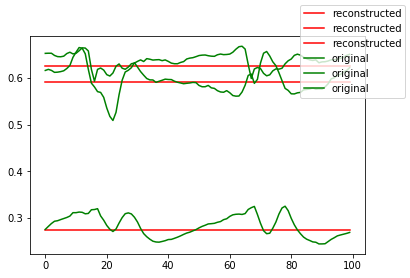

In [97]:
# z = np.transpose(z)
# x = np.transpose(x)
fig, ax = plt.subplots()
ax.plot(z[0], 'r', label = 'reconstructed')
ax.plot(x[0], 'g', label = 'original')
fig.legend()